### ANN for classification, high or low risk class classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import phik
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# load the data
df = pd.read_csv("customer_data.csv")

In [3]:
# see the column explanations here
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
# even distribution along the target classes
df['label'].value_counts()

label
0    900
1    225
Name: count, dtype: int64

In [5]:
df.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [8]:
# We will drop the id column as it is not useful for prediction
df.drop(columns=['id'], inplace=True)

### We have quite many variables, let's study if we can remove some of them

In [9]:
# correlation matrix ordered against the target variable
corr_matrix = df.corr()['label']
corr_matrix.sort_values(ascending=False)

label     1.000000
fea_3     0.071032
fea_1     0.060838
fea_6     0.029296
fea_10    0.019371
fea_5     0.014939
fea_11   -0.003439
fea_9    -0.014688
fea_8    -0.016321
fea_7    -0.027133
fea_2    -0.078808
fea_4    -0.132916
Name: label, dtype: float64

<Axes: >

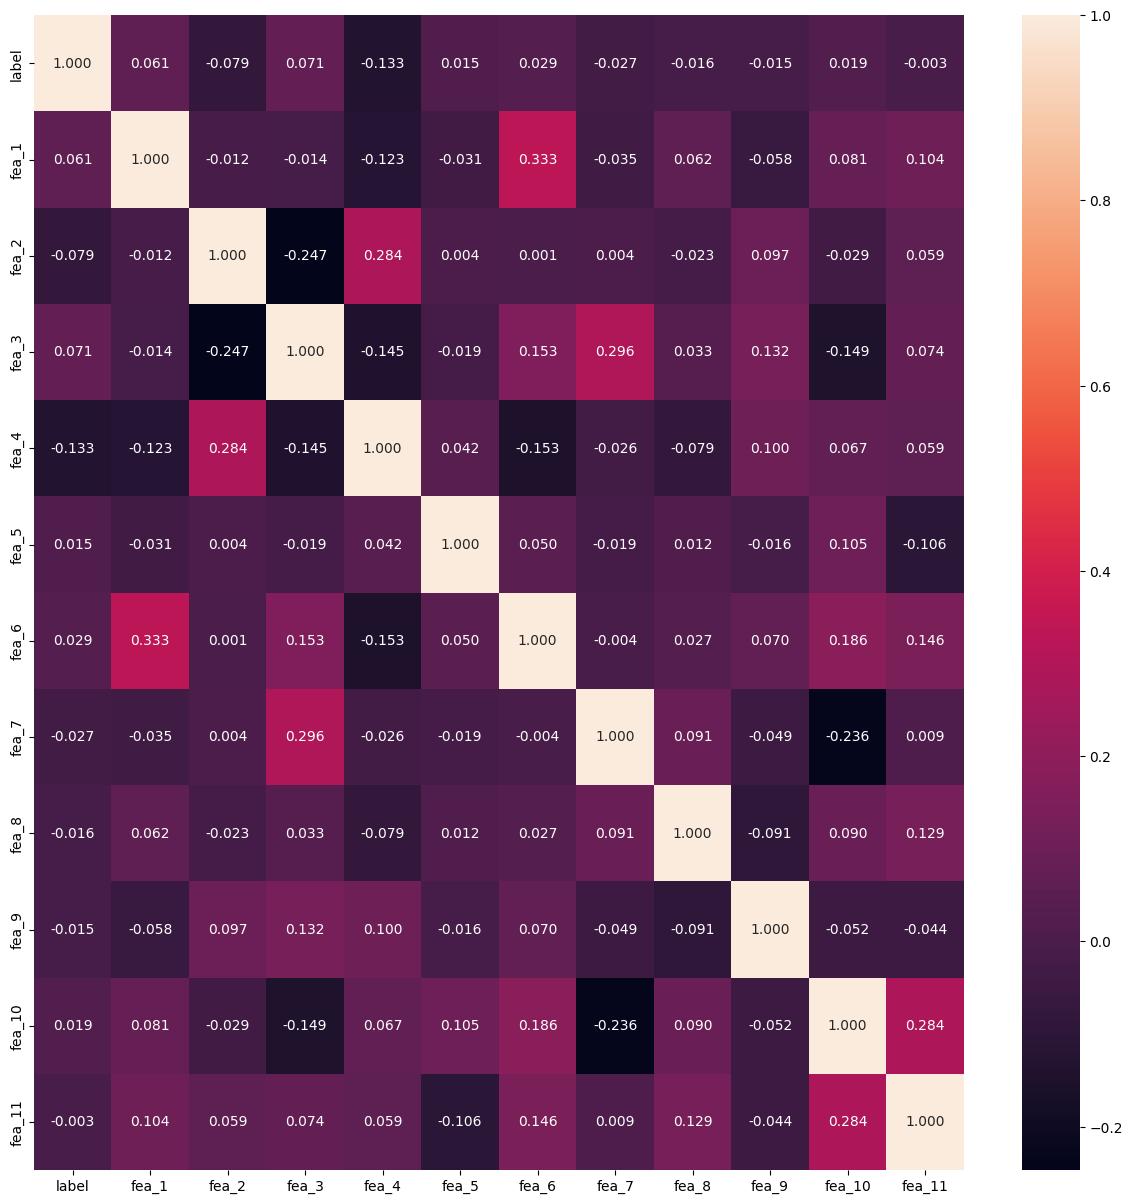

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

interval columns not set, guessing: ['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']


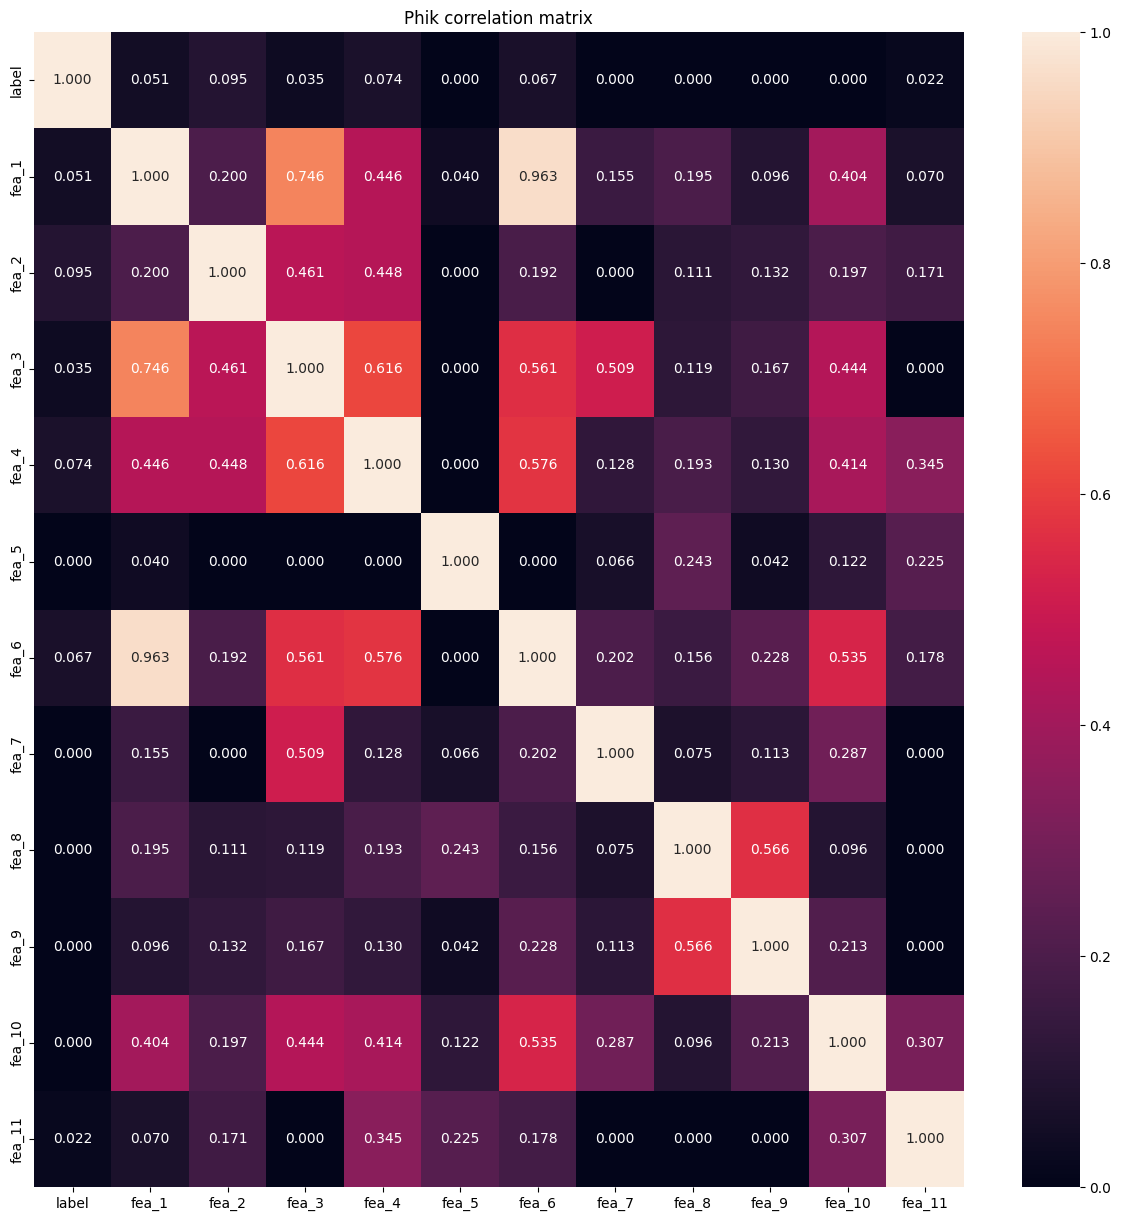

In [11]:

phik_matrix = df.phik_matrix()
plt.figure(figsize=(15, 15))
sns.heatmap(phik_matrix, annot=True, fmt=".3f")
plt.title("Phik correlation matrix")
plt.show()


### Even with the phik matrix we can see that it is still lot quite really correlated to the target 

In [12]:
df.describe()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,0.192623,5.519467,1283.911373,2.364754,1.253709e+05,1.928279,10.920082,4.899590,100.366803,4.206967,161307.911885,130.742740
std,0.394562,1.381797,51.764022,0.930480,9.056357e+04,0.258158,2.664056,2.885891,12.097751,0.868947,150373.596241,117.483572
min,0.000000,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,4.000000,1244.000000,1.000000,7.600000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60043.000000,1.000000
50%,0.000000,5.000000,1281.500000,3.000000,1.060000e+05,2.000000,11.000000,5.000000,104.000000,4.000000,72000.000000,173.205081
75%,0.000000,7.000000,1314.500000,3.000000,1.430000e+05,2.000000,11.000000,5.000000,110.000000,5.000000,151304.000000,204.939015
max,1.000000,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,15.000000,10.000000,115.000000,5.000000,650018.000000,707.106781


### We need to standardize some features to limit the effect of outliers, i used ChatGpt to find how to standardize it by using the imbalance-learn module

In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Everything except the target
X = df.drop("label", axis=1)

# Only the target variable
y = df["label"]

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, but useful for inspection)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaling
print(X_scaled.describe().round(2))


         fea_1    fea_2   fea_3    fea_4    fea_5    fea_6    fea_7    fea_8  \
count  1576.00  1576.00  1576.0  1576.00  1576.00  1576.00  1576.00  1576.00   
mean      0.00    -0.00    -0.0     0.00    -0.00     0.00     0.00     0.00   
std       1.00     1.00     1.0     1.00     1.00     1.00     1.00     1.00   
min      -3.41    -3.39    -1.5    -1.23    -3.20    -3.16    -2.15    -3.15   
25%      -1.13    -0.80    -1.5    -0.57     0.31    -1.16     0.10    -0.72   
50%      -0.37    -0.08     0.7    -0.19     0.31     0.04     0.10     0.24   
75%       1.15     0.64     0.7     0.24     0.31     0.44     0.10     0.85   
max       1.15     4.10     0.7    13.21     0.31     1.65     1.97     1.28   

         fea_9   fea_10   fea_11  
count  1576.00  1576.00  1576.00  
mean     -0.00     0.00     0.00  
std       1.00     1.00     1.00  
min      -3.56    -0.70    -1.21  
25%      -1.26    -0.70    -1.21  
50%      -0.11    -0.62     0.37  
75%       1.04     0.24     0.65  

** Let's try the SelectKBest and compare it to correlation matrix**

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X_scaled.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
3,fea_4,67.83
6,fea_7,29.73
8,fea_9,25.12
1,fea_2,11.16
0,fea_1,10.42
7,fea_8,9.39
5,fea_6,6.23
10,fea_11,1.51
9,fea_10,1.16
2,fea_3,NaN


### At first i tried to drop the fea_3, fea_5 but it occurs to many problems so i decide to let them in the datasets

### train/test/validation -split

In [15]:

# this time, let's split the data into 65% (training data) and 35% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.35)

# step 2, split the temporary data in HALF (0.5) => 17.5% test and 17.5% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1024, 11) (1024,)
(276, 11) (276,)
(276, 11) (276,)


### Create the neural network structure

**NOTE: you can use all the same callback features as in regression: ModelCheckpoint, EarlyStop, ReduceLROnPlateau, Dropout-layers...**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(len(X_scaled.columns),)),
    layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)),
    layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)),
    layers.Dense(1, activation="sigmoid")  # Output layer
])

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,437 (13.43 KB)

 Trainable params: 3,415 (13.34 KB)

 Non-trainable params: 22 (88.00 B)

In [28]:
# train/fit neural network with validation data
# see the instructions on the train/test -split above on how to split the data correctly
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5086 - loss: 0.8271 - val_accuracy: 0.5326 - val_loss: 0.8027
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5506 - loss: 0.8059 - val_accuracy: 0.5761 - val_loss: 0.7853
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6265 - loss: 0.7788 - val_accuracy: 0.5978 - val_loss: 0.7728
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6533 - loss: 0.7496 - val_accuracy: 0.6377 - val_loss: 0.7597
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6188 - loss: 0.7459 - val_accuracy: 0.6377 - val_loss: 0.7517
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.7347 - val_accuracy: 0.6522 - val_loss: 0.7417
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6770 - loss: 0.7109 - val_accuracy: 0.6522 - val_loss: 0.7320
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6689 - loss: 0.7179 - val_accuracy: 0.6594 - val_loss: 0.

### Error and performance metrics

<Axes: >

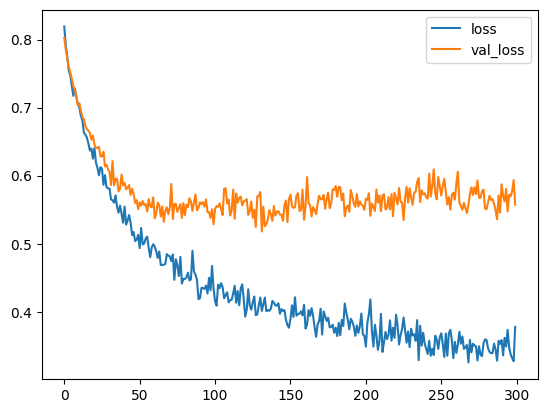

In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

# the model seems to learn fairly well according to loss, not overfitting
# slight room for improvement

<Axes: >

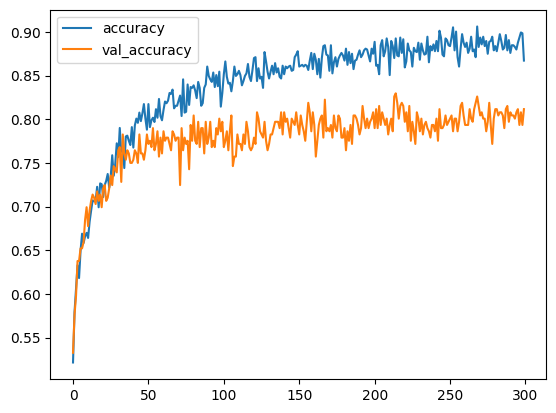

In [30]:
# the validation accuracy is quite high (which is the result from the test dataset)
# training accuracy is a bit low, but val_accuracy is usually more important to maximize
# training accuracy being low implies there's room for improvement still in the model
loss_df[['accuracy', 'val_accuracy']].plot()

In [31]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.5708672404289246, 0.79347825050354]

Train data evaluation:
[0.2223035842180252, 0.96484375]


### Here i didn't use argmax to get categories and instead used raw probabilities, y is already 0/1 so no changes and we need to convert the probality to fit the binary solutions

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
test_predictions = model.predict(X_test)
# Convert probabilities to 0/1 labels
test_predictions = (model.predict(X_test) > 0.5).astype(int)

print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[137   0]
 [139   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       137
           1       0.00      0.00      0.00       139

    accuracy                           0.50       276
   macro avg       0.25      0.50      0.33       276
weighted avg       0.25      0.50      0.33       276



C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pac

<Axes: >

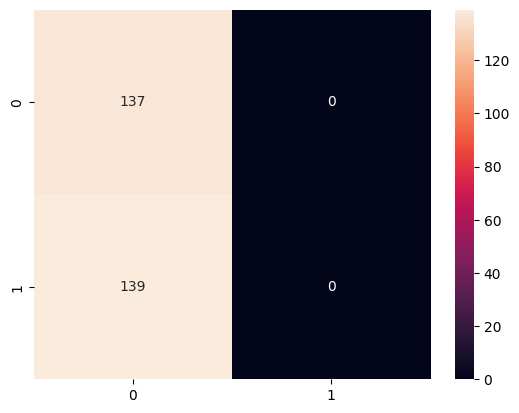

In [22]:
# confusion matrix

sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=[0,1], yticklabels=[0,1])

In [23]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.5418073127367361

### Test the model in practice with new data, i use AI to stay in the scale of my data

In [24]:
X.columns

Index(['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8',
       'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [25]:
df.head(3)

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.50,3,77000.00,2,15,5,109,5,151300,244.95
1,0,4,1277.00,1,113000.00,2,8,-1,100,3,341759,207.17
2,0,7,1298.00,1,110000.00,2,11,-1,101,5,72001,1.00


In [26]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
tester_row = {
    'fea_1': 6,
    'fea_2': 1250.0,
    'fea_3': 2,
    'fea_4': 95000.0,
    'fea_5': 2,
    'fea_6': 12,
    'fea_7': 3,
    'fea_8': 105,
    'fea_9': 4,
    'fea_10': 220000,
    'fea_11': 210.0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
tester_row_scaled = scaler.transform(tester_row)
result = model.predict(tester_row_scaled)[0]
result_text = ['High Risk','Low Risk'][np.argmax(result)]

print("Probabilities by class:")
print('Low Risk: {:.9f}'.format(1-result[0]))
print('High Risk: {:.9f}'.format(result[0]))
print()
print(f"Predicted price range: {result_text}")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Probabilities by class:
Low Risk: 0.513381183
High Risk: 0.486618817

Predicted price range: High Risk
[0.48661882]
